In [1]:
import pandas as pd
import datetime
import json

In [2]:
with open('transaction-data-adhoc-analysis.json','r') as f:
    data=json.load(f)

In [3]:
transactionsdf=pd.DataFrame(data)

In [4]:
transactionsdf

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022/01/12
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",5500,2022/01/08
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/10
4,"33911 Hansen Loaf\nWest Sandra, ND 54188",1949/09/27,michael78@yahoo.com,Kristen Cooper,F,qhernandez,"Candy City,Orange Beans,(x3);Candy City,Gummy ...",2697,2022/01/24
...,...,...,...,...,...,...,...,...,...
83031,"96081 Harrison Brooks\nJenniferbury, MA 02124",2019/10/26,christina55@hotmail.com,Tammy Byrd,F,kmcconnell,"Exotic Extras,Kimchi and Seaweed,(x2);HealthyK...",3588,2022/06/05
83032,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Yummy Vegetables,(x1);Exotic Ext...",2095,2022/06/12
83033,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"Candy City,Orange Beans,(x4);Candy City,Gummy ...",3396,2022/06/15
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk,(x2);Candy City,G...",4280,2022/06/09


In [5]:
transactionsdf['month'] = pd.DatetimeIndex(transactionsdf['transaction_date']).month

In [6]:
month_1=transactionsdf[['name','month']]

In [7]:
month_1

,name,month
0,Jennifer Campbell,1
1,Melissa Kim,1
2,Melissa Kim,1
3,Melissa Kim,1
4,Kristen Cooper,1
...,...,...
83031,Tammy Byrd,6
83032,Donald Andersen,6
83033,Donald Andersen,6
83034,Donald Andersen,6


In [14]:
def has_1(x):
    if x==1:
        return True 
    else: 
        return False

In [15]:
def has_2(x):
    if x==2:
        return True 
    else: 
        return False

In [16]:
def has_3(x):
    if x==3:
        return True 
    else: 
        return False

In [17]:
def has_4(x):
    if x==4:
        return True 
    else: 
        return False

In [18]:
def has_5(x):
    if x==5:
        return True 
    else: 
        return False

In [19]:
def has_6(x):
    if x==6:
        return True 
    else: 
        return False

In [20]:
month_1["month 1"]=month_1["month"].apply(has_1)

/var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/ipykernel_1337/75514049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_1["month 1"]=month_1["month"].apply(has_1)


In [21]:
month_1

,name,month,month 1
0,Jennifer Campbell,1,True
1,Melissa Kim,1,True
2,Melissa Kim,1,True
3,Melissa Kim,1,True
4,Kristen Cooper,1,True
...,...,...,...
83031,Tammy Byrd,6,False
83032,Donald Andersen,6,False
83033,Donald Andersen,6,False
83034,Donald Andersen,6,False


In [23]:
trial_table_final_1=pd.pivot_table(month_1, values=["month 1"], index=["name"], columns="month", aggfunc='sum', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False)

In [24]:
trial_table_final_1

month 1                         
month                   1    2    3    4    5    6
name                                              
Aaron Beasley         NaN  NaN  NaN  0.0  0.0  0.0
Aaron Brewer          1.0  0.0  0.0  0.0  NaN  0.0
Aaron Brown           NaN  NaN  0.0  0.0  0.0  0.0
Aaron Coffey          1.0  0.0  0.0  0.0  0.0  NaN
Aaron Davis           1.0  0.0  NaN  0.0  0.0  0.0
...                   ...  ...  ...  ...  ...  ...
Zachary Valentine     1.0  0.0  0.0  0.0  0.0  0.0
Zachary Ware          1.0  0.0  0.0  0.0  0.0  0.0
Zachary Williams      4.0  0.0  0.0  0.0  NaN  NaN
Zachary Wilson        NaN  NaN  NaN  0.0  0.0  0.0
Zachary York          2.0  0.0  0.0  0.0  0.0  0.0

[8487 rows x 6 columns]

In [25]:
month_1_finaldf=trial_table_final_1.reset_index()

In [26]:
month_1_finaldf

name month 1                         
month                          1    2    3    4    5    6
0          Aaron Beasley     NaN  NaN  NaN  0.0  0.0  0.0
1           Aaron Brewer     1.0  0.0  0.0  0.0  NaN  0.0
2            Aaron Brown     NaN  NaN  0.0  0.0  0.0  0.0
3           Aaron Coffey     1.0  0.0  0.0  0.0  0.0  NaN
4            Aaron Davis     1.0  0.0  NaN  0.0  0.0  0.0
...                  ...     ...  ...  ...  ...  ...  ...
8482   Zachary Valentine     1.0  0.0  0.0  0.0  0.0  0.0
8483        Zachary Ware     1.0  0.0  0.0  0.0  0.0  0.0
8484    Zachary Williams     4.0  0.0  0.0  0.0  NaN  NaN
8485      Zachary Wilson     NaN  NaN  NaN  0.0  0.0  0.0
8486        Zachary York     2.0  0.0  0.0  0.0  0.0  0.0

[8487 rows x 7 columns]

In [27]:
month1_final2=month_1_finaldf["month 1"]

In [28]:
month1_final2

month,1,2,3,4,5,6
0,NaN,NaN,NaN,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,NaN,0.0
2,NaN,NaN,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,NaN
4,1.0,0.0,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...
8482,1.0,0.0,0.0,0.0,0.0,0.0
8483,1.0,0.0,0.0,0.0,0.0,0.0
8484,4.0,0.0,0.0,0.0,NaN,NaN
8485,NaN,NaN,NaN,0.0,0.0,0.0


In [29]:
final_table_month1=month_1_finaldf[["name"]]

In [30]:
final_table_month1["month1"]=month1_final2[[1]]

/var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/ipykernel_1337/3810076520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_table_month1["month1"]=month1_final2[[1]]


In [31]:
final_table_month1

,name,month1
month,,
0,Aaron Beasley,NaN
1,Aaron Brewer,1.0
2,Aaron Brown,NaN
3,Aaron Coffey,1.0
4,Aaron Davis,1.0
...,...,...
8482,Zachary Valentine,1.0
8483,Zachary Ware,1.0
8484,Zachary Williams,4.0


In [32]:
final_table_month1['month1'] = final_table_month1['month1'].fillna(0)

/var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/ipykernel_1337/517480442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_table_month1['month1'] = final_table_month1['month1'].fillna(0)


In [33]:
final_table_month1

,name,month1
month,,
0,Aaron Beasley,0.0
1,Aaron Brewer,1.0
2,Aaron Brown,0.0
3,Aaron Coffey,1.0
4,Aaron Davis,1.0
...,...,...
8482,Zachary Valentine,1.0
8483,Zachary Ware,1.0
8484,Zachary Williams,4.0


In [34]:
month_2=transactionsdf[['name','month']]

In [35]:
month_2["month 2"]=month_1["month"].apply(has_2)

/var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/ipykernel_1337/2884953539.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_2["month 2"]=month_1["month"].apply(has_2)


In [36]:
month_2

,name,month,month 2
0,Jennifer Campbell,1,False
1,Melissa Kim,1,False
2,Melissa Kim,1,False
3,Melissa Kim,1,False
4,Kristen Cooper,1,False
...,...,...,...
83031,Tammy Byrd,6,False
83032,Donald Andersen,6,False
83033,Donald Andersen,6,False
83034,Donald Andersen,6,False


In [37]:
trial_table_final_2=pd.pivot_table(month_2, values=["month 2"], index=["name"], columns="month", aggfunc='sum', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False)

In [38]:
trial_table_final_2

month 2                         
month                   1    2    3    4    5    6
name                                              
Aaron Beasley         NaN  NaN  NaN  0.0  0.0  0.0
Aaron Brewer          0.0  1.0  0.0  0.0  NaN  0.0
Aaron Brown           NaN  NaN  0.0  0.0  0.0  0.0
Aaron Coffey          0.0  2.0  0.0  0.0  0.0  NaN
Aaron Davis           0.0  1.0  NaN  0.0  0.0  0.0
...                   ...  ...  ...  ...  ...  ...
Zachary Valentine     0.0  1.0  0.0  0.0  0.0  0.0
Zachary Ware          0.0  2.0  0.0  0.0  0.0  0.0
Zachary Williams      0.0  4.0  0.0  0.0  NaN  NaN
Zachary Wilson        NaN  NaN  NaN  0.0  0.0  0.0
Zachary York          0.0  2.0  0.0  0.0  0.0  0.0

[8487 rows x 6 columns]

In [39]:
month_2_finaldf=trial_table_final_2.reset_index()

In [40]:
month_2_finaldf

name month 2                         
month                          1    2    3    4    5    6
0          Aaron Beasley     NaN  NaN  NaN  0.0  0.0  0.0
1           Aaron Brewer     0.0  1.0  0.0  0.0  NaN  0.0
2            Aaron Brown     NaN  NaN  0.0  0.0  0.0  0.0
3           Aaron Coffey     0.0  2.0  0.0  0.0  0.0  NaN
4            Aaron Davis     0.0  1.0  NaN  0.0  0.0  0.0
...                  ...     ...  ...  ...  ...  ...  ...
8482   Zachary Valentine     0.0  1.0  0.0  0.0  0.0  0.0
8483        Zachary Ware     0.0  2.0  0.0  0.0  0.0  0.0
8484    Zachary Williams     0.0  4.0  0.0  0.0  NaN  NaN
8485      Zachary Wilson     NaN  NaN  NaN  0.0  0.0  0.0
8486        Zachary York     0.0  2.0  0.0  0.0  0.0  0.0

[8487 rows x 7 columns]

In [41]:
final_table_month2=month_2_finaldf[["name"]]

In [42]:
month2_final2=month_2_finaldf["month 2"]

In [43]:
final_table_month2["month2"]=month2_final2[[2]]

/var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/ipykernel_1337/263883670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_table_month2["month2"]=month2_final2[[2]]


In [44]:
final_table_month2

,name,month2
month,,
0,Aaron Beasley,NaN
1,Aaron Brewer,1.0
2,Aaron Brown,NaN
3,Aaron Coffey,2.0
4,Aaron Davis,1.0
...,...,...
8482,Zachary Valentine,1.0
8483,Zachary Ware,2.0
8484,Zachary Williams,4.0


In [45]:
final_table_month1["month 2"]=final_table_month2["month2"]

/var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/ipykernel_1337/1528925628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_table_month1["month 2"]=final_table_month2["month2"]


In [46]:
final_table_month1

,name,month1,month 2
month,,,
0,Aaron Beasley,0.0,NaN
1,Aaron Brewer,1.0,1.0
2,Aaron Brown,0.0,NaN
3,Aaron Coffey,1.0,2.0
4,Aaron Davis,1.0,1.0
...,...,...,...
8482,Zachary Valentine,1.0,1.0
8483,Zachary Ware,1.0,2.0
8484,Zachary Williams,4.0,4.0


In [47]:
final_table_month1['month 2'] = final_table_month1['month 2'].fillna(0)

/var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/ipykernel_1337/3961057090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_table_month1['month 2'] = final_table_month1['month 2'].fillna(0)


In [48]:
final_table_month1

,name,month1,month 2
month,,,
0,Aaron Beasley,0.0,0.0
1,Aaron Brewer,1.0,1.0
2,Aaron Brown,0.0,0.0
3,Aaron Coffey,1.0,2.0
4,Aaron Davis,1.0,1.0
...,...,...,...
8482,Zachary Valentine,1.0,1.0
8483,Zachary Ware,1.0,2.0
8484,Zachary Williams,4.0,4.0


In [49]:
month_3=transactionsdf[['name','month']]

In [50]:
month_3["month 3"]=month_3["month"].apply(has_3)

/var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/ipykernel_1337/1939846033.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_3["month 3"]=month_3["month"].apply(has_3)


In [51]:
month_3

,name,month,month 3
0,Jennifer Campbell,1,False
1,Melissa Kim,1,False
2,Melissa Kim,1,False
3,Melissa Kim,1,False
4,Kristen Cooper,1,False
...,...,...,...
83031,Tammy Byrd,6,False
83032,Donald Andersen,6,False
83033,Donald Andersen,6,False
83034,Donald Andersen,6,False


In [52]:
trial_table_final_3=pd.pivot_table(month_3, values=["month 3"], index=["name"], columns="month", aggfunc='sum', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False)

In [53]:
trial_table_final_3

month 3                         
month                   1    2    3    4    5    6
name                                              
Aaron Beasley         NaN  NaN  NaN  0.0  0.0  0.0
Aaron Brewer          0.0  0.0  1.0  0.0  NaN  0.0
Aaron Brown           NaN  NaN  3.0  0.0  0.0  0.0
Aaron Coffey          0.0  0.0  2.0  0.0  0.0  NaN
Aaron Davis           0.0  0.0  NaN  0.0  0.0  0.0
...                   ...  ...  ...  ...  ...  ...
Zachary Valentine     0.0  0.0  1.0  0.0  0.0  0.0
Zachary Ware          0.0  0.0  3.0  0.0  0.0  0.0
Zachary Williams      0.0  0.0  4.0  0.0  NaN  NaN
Zachary Wilson        NaN  NaN  NaN  0.0  0.0  0.0
Zachary York          0.0  0.0  1.0  0.0  0.0  0.0

[8487 rows x 6 columns]

In [54]:
month_3_finaldf=trial_table_final_3.reset_index()

In [55]:
month3_final2=month_3_finaldf["month 3"]

In [56]:
final_table_month3=month_3_finaldf[["name"]]

In [57]:
final_table_month3["month 3"]=month3_final2[[3]]

/var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/ipykernel_1337/1773773047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_table_month3["month 3"]=month3_final2[[3]]


In [58]:
final_table_month3

,name,month 3
month,,
0,Aaron Beasley,NaN
1,Aaron Brewer,1.0
2,Aaron Brown,3.0
3,Aaron Coffey,2.0
4,Aaron Davis,NaN
...,...,...
8482,Zachary Valentine,1.0
8483,Zachary Ware,3.0
8484,Zachary Williams,4.0


In [59]:
final_table_month3['month 3'] = final_table_month3['month 3'].fillna(0)

/var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/ipykernel_1337/1374575300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_table_month3['month 3'] = final_table_month3['month 3'].fillna(0)


In [60]:
final_table_month3

,name,month 3
month,,
0,Aaron Beasley,0.0
1,Aaron Brewer,1.0
2,Aaron Brown,3.0
3,Aaron Coffey,2.0
4,Aaron Davis,0.0
...,...,...
8482,Zachary Valentine,1.0
8483,Zachary Ware,3.0
8484,Zachary Williams,4.0


In [61]:
final_table_month1["month 3"]=final_table_month3["month 3"]

/var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/ipykernel_1337/2370470641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_table_month1["month 3"]=final_table_month3["month 3"]


In [62]:
final_table_month1

,name,month1,month 2,month 3
month,,,,
0,Aaron Beasley,0.0,0.0,0.0
1,Aaron Brewer,1.0,1.0,1.0
2,Aaron Brown,0.0,0.0,3.0
3,Aaron Coffey,1.0,2.0,2.0
4,Aaron Davis,1.0,1.0,0.0
...,...,...,...,...
8482,Zachary Valentine,1.0,1.0,1.0
8483,Zachary Ware,1.0,2.0,3.0
8484,Zachary Williams,4.0,4.0,4.0


In [63]:
month_4=transactionsdf[['name','month']]

In [64]:
month_4["month 4"]=month_4["month"].apply(has_4)

/var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/ipykernel_1337/1259899495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_4["month 4"]=month_4["month"].apply(has_4)


In [65]:
month_4

,name,month,month 4
0,Jennifer Campbell,1,False
1,Melissa Kim,1,False
2,Melissa Kim,1,False
3,Melissa Kim,1,False
4,Kristen Cooper,1,False
...,...,...,...
83031,Tammy Byrd,6,False
83032,Donald Andersen,6,False
83033,Donald Andersen,6,False
83034,Donald Andersen,6,False


In [66]:
trial_table_final_4=pd.pivot_table(month_4, values=["month 4"], index=["name"], columns="month", aggfunc='sum', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False)

In [67]:
trial_table_final_4

month 4                         
month                   1    2    3    4    5    6
name                                              
Aaron Beasley         NaN  NaN  NaN  2.0  0.0  0.0
Aaron Brewer          0.0  0.0  0.0  2.0  NaN  0.0
Aaron Brown           NaN  NaN  0.0  2.0  0.0  0.0
Aaron Coffey          0.0  0.0  0.0  2.0  0.0  NaN
Aaron Davis           0.0  0.0  NaN  3.0  0.0  0.0
...                   ...  ...  ...  ...  ...  ...
Zachary Valentine     0.0  0.0  0.0  1.0  0.0  0.0
Zachary Ware          0.0  0.0  0.0  1.0  0.0  0.0
Zachary Williams      0.0  0.0  0.0  4.0  NaN  NaN
Zachary Wilson        NaN  NaN  NaN  1.0  0.0  0.0
Zachary York          0.0  0.0  0.0  3.0  0.0  0.0

[8487 rows x 6 columns]

In [68]:
month_4_finaldf=trial_table_final_4.reset_index()

In [69]:
month_4_finaldf

name month 4                         
month                          1    2    3    4    5    6
0          Aaron Beasley     NaN  NaN  NaN  2.0  0.0  0.0
1           Aaron Brewer     0.0  0.0  0.0  2.0  NaN  0.0
2            Aaron Brown     NaN  NaN  0.0  2.0  0.0  0.0
3           Aaron Coffey     0.0  0.0  0.0  2.0  0.0  NaN
4            Aaron Davis     0.0  0.0  NaN  3.0  0.0  0.0
...                  ...     ...  ...  ...  ...  ...  ...
8482   Zachary Valentine     0.0  0.0  0.0  1.0  0.0  0.0
8483        Zachary Ware     0.0  0.0  0.0  1.0  0.0  0.0
8484    Zachary Williams     0.0  0.0  0.0  4.0  NaN  NaN
8485      Zachary Wilson     NaN  NaN  NaN  1.0  0.0  0.0
8486        Zachary York     0.0  0.0  0.0  3.0  0.0  0.0

[8487 rows x 7 columns]

In [70]:
month4_final2=month_4_finaldf["month 4"]

In [71]:
month4_final2[4]

0       2.0
1       2.0
2       2.0
3       2.0
4       3.0
       ... 
8482    1.0
8483    1.0
8484    4.0
8485    1.0
8486    3.0
Name: 4, Length: 8487, dtype: float64

In [72]:
final_table_month4=month_4_finaldf[["name"]]

In [73]:
final_table_month4["month 4"]=month4_final2[[4]]

/var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/ipykernel_1337/1784991643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_table_month4["month 4"]=month4_final2[[4]]


In [74]:
final_table_month4["month 4"]=month4_final2[[4]]

/var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/ipykernel_1337/1784991643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_table_month4["month 4"]=month4_final2[[4]]


In [75]:
final_table_month4.drop("month 4",inplace=True, axis=1)

/Users/salvadorfamily/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/Users/salvadorfamily/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [76]:
final_table_month4

,name
month,
0,Aaron Beasley
1,Aaron Brewer
2,Aaron Brown
3,Aaron Coffey
4,Aaron Davis
...,...
8482,Zachary Valentine
8483,Zachary Ware
8484,Zachary Williams


In [77]:
final_table_month4["month 4"]=month4_final2[[4]]

/var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/ipykernel_1337/1784991643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_table_month4["month 4"]=month4_final2[[4]]


In [78]:
final_table_month4

,name,month 4
month,,
0,Aaron Beasley,2.0
1,Aaron Brewer,2.0
2,Aaron Brown,2.0
3,Aaron Coffey,2.0
4,Aaron Davis,3.0
...,...,...
8482,Zachary Valentine,1.0
8483,Zachary Ware,1.0
8484,Zachary Williams,4.0


In [79]:
final_table_month4['month 4'] = final_table_month4['month 4'].fillna(0)

/var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/ipykernel_1337/2026692156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_table_month4['month 4'] = final_table_month4['month 4'].fillna(0)


In [80]:
final_table_month1["month 4"]=final_table_month4["month 4"]

/var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/ipykernel_1337/1044375227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_table_month1["month 4"]=final_table_month4["month 4"]


In [81]:
final_table_month1

,name,month1,month 2,month 3,month 4
month,,,,,
0,Aaron Beasley,0.0,0.0,0.0,2.0
1,Aaron Brewer,1.0,1.0,1.0,2.0
2,Aaron Brown,0.0,0.0,3.0,2.0
3,Aaron Coffey,1.0,2.0,2.0,2.0
4,Aaron Davis,1.0,1.0,0.0,3.0
...,...,...,...,...,...
8482,Zachary Valentine,1.0,1.0,1.0,1.0
8483,Zachary Ware,1.0,2.0,3.0,1.0
8484,Zachary Williams,4.0,4.0,4.0,4.0


In [82]:
month_5=transactionsdf[['name','month']]

In [83]:
month_5["month 5"]=month_5["month"].apply(has_5)

/var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/ipykernel_1337/567742273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_5["month 5"]=month_5["month"].apply(has_5)


In [84]:
month_5

,name,month,month 5
0,Jennifer Campbell,1,False
1,Melissa Kim,1,False
2,Melissa Kim,1,False
3,Melissa Kim,1,False
4,Kristen Cooper,1,False
...,...,...,...
83031,Tammy Byrd,6,False
83032,Donald Andersen,6,False
83033,Donald Andersen,6,False
83034,Donald Andersen,6,False


In [86]:
trial_table_final_5=pd.pivot_table(month_5, values=["month 5"], index=["name"], columns="month", aggfunc='sum', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False)

In [87]:
month_5_finaldf=trial_table_final_5.reset_index()

In [88]:
month_5_finaldf

name month 5                         
month                          1    2    3    4    5    6
0          Aaron Beasley     NaN  NaN  NaN  0.0  2.0  0.0
1           Aaron Brewer     0.0  0.0  0.0  0.0  NaN  0.0
2            Aaron Brown     NaN  NaN  0.0  0.0  1.0  0.0
3           Aaron Coffey     0.0  0.0  0.0  0.0  2.0  NaN
4            Aaron Davis     0.0  0.0  NaN  0.0  3.0  0.0
...                  ...     ...  ...  ...  ...  ...  ...
8482   Zachary Valentine     0.0  0.0  0.0  0.0  2.0  0.0
8483        Zachary Ware     0.0  0.0  0.0  0.0  3.0  0.0
8484    Zachary Williams     0.0  0.0  0.0  0.0  NaN  NaN
8485      Zachary Wilson     NaN  NaN  NaN  0.0  2.0  0.0
8486        Zachary York     0.0  0.0  0.0  0.0  3.0  0.0

[8487 rows x 7 columns]

In [89]:
month5_final2=month_5_finaldf["month 5"]

In [90]:
final_table_month5=month_5_finaldf[["name"]]

In [91]:
final_table_month5["month 5"]=month5_final2[[5]]

/var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/ipykernel_1337/3080492454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_table_month5["month 5"]=month5_final2[[5]]


In [92]:
final_table_month5

,name,month 5
month,,
0,Aaron Beasley,2.0
1,Aaron Brewer,NaN
2,Aaron Brown,1.0
3,Aaron Coffey,2.0
4,Aaron Davis,3.0
...,...,...
8482,Zachary Valentine,2.0
8483,Zachary Ware,3.0
8484,Zachary Williams,NaN


In [93]:
final_table_month5['month 5'] = final_table_month5['month 5'].fillna(0)

/var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/ipykernel_1337/833562392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_table_month5['month 5'] = final_table_month5['month 5'].fillna(0)


In [94]:
final_table_month1["month 5"]=final_table_month5["month 5"]

/var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/ipykernel_1337/3126394332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_table_month1["month 5"]=final_table_month5["month 5"]


In [95]:
final_table_month1

,name,month1,month 2,month 3,month 4,month 5
month,,,,,,
0,Aaron Beasley,0.0,0.0,0.0,2.0,2.0
1,Aaron Brewer,1.0,1.0,1.0,2.0,0.0
2,Aaron Brown,0.0,0.0,3.0,2.0,1.0
3,Aaron Coffey,1.0,2.0,2.0,2.0,2.0
4,Aaron Davis,1.0,1.0,0.0,3.0,3.0
...,...,...,...,...,...,...
8482,Zachary Valentine,1.0,1.0,1.0,1.0,2.0
8483,Zachary Ware,1.0,2.0,3.0,1.0,3.0
8484,Zachary Williams,4.0,4.0,4.0,4.0,0.0


In [96]:
month_6=transactionsdf[['name','month']]

In [97]:
month_6["month 6"]=month_6["month"].apply(has_6)

/var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/ipykernel_1337/211044660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_6["month 6"]=month_6["month"].apply(has_6)


In [98]:
month_6

,name,month,month 6
0,Jennifer Campbell,1,False
1,Melissa Kim,1,False
2,Melissa Kim,1,False
3,Melissa Kim,1,False
4,Kristen Cooper,1,False
...,...,...,...
83031,Tammy Byrd,6,True
83032,Donald Andersen,6,True
83033,Donald Andersen,6,True
83034,Donald Andersen,6,True


In [99]:
trial_table_final_6=pd.pivot_table(month_6, values=["month 6"], index=["name"], columns="month", aggfunc='sum', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False)

In [100]:
trial_table_final_6

month 6                         
month                   1    2    3    4    5    6
name                                              
Aaron Beasley         NaN  NaN  NaN  0.0  0.0  1.0
Aaron Brewer          0.0  0.0  0.0  0.0  NaN  2.0
Aaron Brown           NaN  NaN  0.0  0.0  0.0  1.0
Aaron Coffey          0.0  0.0  0.0  0.0  0.0  NaN
Aaron Davis           0.0  0.0  NaN  0.0  0.0  2.0
...                   ...  ...  ...  ...  ...  ...
Zachary Valentine     0.0  0.0  0.0  0.0  0.0  3.0
Zachary Ware          0.0  0.0  0.0  0.0  0.0  2.0
Zachary Williams      0.0  0.0  0.0  0.0  NaN  NaN
Zachary Wilson        NaN  NaN  NaN  0.0  0.0  2.0
Zachary York          0.0  0.0  0.0  0.0  0.0  1.0

[8487 rows x 6 columns]

In [101]:
month_6_finaldf=trial_table_final_6.reset_index()

In [102]:
month6_final2=month_6_finaldf["month 6"]

In [103]:
final_table_month6=month_6_finaldf[["name"]]

In [104]:
final_table_month6["month 6"]=month6_final2[[6]]

/var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/ipykernel_1337/2566254641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_table_month6["month 6"]=month6_final2[[6]]


In [105]:
final_table_month6

,name,month 6
month,,
0,Aaron Beasley,1.0
1,Aaron Brewer,2.0
2,Aaron Brown,1.0
3,Aaron Coffey,NaN
4,Aaron Davis,2.0
...,...,...
8482,Zachary Valentine,3.0
8483,Zachary Ware,2.0
8484,Zachary Williams,NaN


In [106]:
final_table_month6['month 6'] = final_table_month6['month 6'].fillna(0)

/var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/ipykernel_1337/2801403969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_table_month6['month 6'] = final_table_month6['month 6'].fillna(0)


In [107]:
final_table_month1["month 6"]=final_table_month6["month 6"]

In [108]:
final_table_month1

,name,month1,month 2,month 3,month 4,month 5,month 6
month,,,,,,,
0,Aaron Beasley,0.0,0.0,0.0,2.0,2.0,1.0
1,Aaron Brewer,1.0,1.0,1.0,2.0,0.0,2.0
2,Aaron Brown,0.0,0.0,3.0,2.0,1.0,1.0
3,Aaron Coffey,1.0,2.0,2.0,2.0,2.0,0.0
4,Aaron Davis,1.0,1.0,0.0,3.0,3.0,2.0
...,...,...,...,...,...,...,...
8482,Zachary Valentine,1.0,1.0,1.0,1.0,2.0,3.0
8483,Zachary Ware,1.0,2.0,3.0,1.0,3.0,2.0
8484,Zachary Williams,4.0,4.0,4.0,4.0,0.0,0.0


In [109]:
import numpy as np

In [110]:
final_table_month1['Month 2 Repeaters'] = np.where((final_table_month1["month1"] > 0) & (final_table_month1["month 2"] >0), True, False)

In [111]:
final_table_month1

,name,month1,month 2,month 3,month 4,month 5,month 6,Month 2 Repeaters
month,,,,,,,,
0,Aaron Beasley,0.0,0.0,0.0,2.0,2.0,1.0,False
1,Aaron Brewer,1.0,1.0,1.0,2.0,0.0,2.0,True
2,Aaron Brown,0.0,0.0,3.0,2.0,1.0,1.0,False
3,Aaron Coffey,1.0,2.0,2.0,2.0,2.0,0.0,True
4,Aaron Davis,1.0,1.0,0.0,3.0,3.0,2.0,True
...,...,...,...,...,...,...,...,...
8482,Zachary Valentine,1.0,1.0,1.0,1.0,2.0,3.0,True
8483,Zachary Ware,1.0,2.0,3.0,1.0,3.0,2.0,True
8484,Zachary Williams,4.0,4.0,4.0,4.0,0.0,0.0,True


In [112]:
final_table_month1['Month 3 Repeaters'] = np.where((final_table_month1["month 2"] > 0) & (final_table_month1["month 3"] >0), True, False)

In [113]:
final_table_month1['Month 4 Repeaters'] = np.where((final_table_month1["month 3"] > 0) & (final_table_month1["month 4"] >0), True, False)

In [114]:
final_table_month1['Month 5 Repeaters'] = np.where((final_table_month1["month 4"] > 0) & (final_table_month1["month 5"] >0), True, False)

In [115]:
final_table_month1['Month 6 Repeaters'] = np.where((final_table_month1["month 5"] > 0) & (final_table_month1["month 6"] >0), True, False)

In [116]:
final_table_month1

,name,month1,month 2,month 3,month 4,month 5,month 6,Month 2 Repeaters,Month 3 Repeaters,Month 4 Repeaters,Month 5 Repeaters,Month 6 Repeaters
month,,,,,,,,,,,,
0,Aaron Beasley,0.0,0.0,0.0,2.0,2.0,1.0,False,False,False,True,True
1,Aaron Brewer,1.0,1.0,1.0,2.0,0.0,2.0,True,True,True,False,False
2,Aaron Brown,0.0,0.0,3.0,2.0,1.0,1.0,False,False,True,True,True
3,Aaron Coffey,1.0,2.0,2.0,2.0,2.0,0.0,True,True,True,True,False
4,Aaron Davis,1.0,1.0,0.0,3.0,3.0,2.0,True,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8482,Zachary Valentine,1.0,1.0,1.0,1.0,2.0,3.0,True,True,True,True,True
8483,Zachary Ware,1.0,2.0,3.0,1.0,3.0,2.0,True,True,True,True,True
8484,Zachary Williams,4.0,4.0,4.0,4.0,0.0,0.0,True,True,True,False,False


In [117]:
final_table_month1_inactive=final_table_month1[["name","month1","month 2","month 3","month 4","month 5","month 6"]]

In [118]:
final_table_month1_inactive

,name,month1,month 2,month 3,month 4,month 5,month 6
month,,,,,,,
0,Aaron Beasley,0.0,0.0,0.0,2.0,2.0,1.0
1,Aaron Brewer,1.0,1.0,1.0,2.0,0.0,2.0
2,Aaron Brown,0.0,0.0,3.0,2.0,1.0,1.0
3,Aaron Coffey,1.0,2.0,2.0,2.0,2.0,0.0
4,Aaron Davis,1.0,1.0,0.0,3.0,3.0,2.0
...,...,...,...,...,...,...,...
8482,Zachary Valentine,1.0,1.0,1.0,1.0,2.0,3.0
8483,Zachary Ware,1.0,2.0,3.0,1.0,3.0,2.0
8484,Zachary Williams,4.0,4.0,4.0,4.0,0.0,0.0


In [ ]:
#code for inactive was done after engaged part

In [119]:
final_table_month1_engaged=final_table_month1[["name","month1","month 2","month 3","month 4","month 5","month 6"]]

In [120]:
final_table_month1_engaged

,name,month1,month 2,month 3,month 4,month 5,month 6
month,,,,,,,
0,Aaron Beasley,0.0,0.0,0.0,2.0,2.0,1.0
1,Aaron Brewer,1.0,1.0,1.0,2.0,0.0,2.0
2,Aaron Brown,0.0,0.0,3.0,2.0,1.0,1.0
3,Aaron Coffey,1.0,2.0,2.0,2.0,2.0,0.0
4,Aaron Davis,1.0,1.0,0.0,3.0,3.0,2.0
...,...,...,...,...,...,...,...
8482,Zachary Valentine,1.0,1.0,1.0,1.0,2.0,3.0
8483,Zachary Ware,1.0,2.0,3.0,1.0,3.0,2.0
8484,Zachary Williams,4.0,4.0,4.0,4.0,0.0,0.0


In [121]:
final_table_month1_engaged['Month 1 Engaged'] = np.where((final_table_month1_engaged["month1"] > 0), True, False)

/var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/ipykernel_1337/624213706.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_table_month1_engaged['Month 1 Engaged'] = np.where((final_table_month1_engaged["month1"] > 0), True, False)


In [122]:
final_table_month1_engaged['Month 2 Engaged'] = np.where((final_table_month1_engaged["month1"] > 0) & (final_table_month1_engaged["month 2"] >0), True, False)

/var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/ipykernel_1337/767484494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_table_month1_engaged['Month 2 Engaged'] = np.where((final_table_month1_engaged["month1"] > 0) & (final_table_month1_engaged["month 2"] >0), True, False)


In [123]:
final_table_month1_engaged['Month 3 Engaged'] = np.where((final_table_month1_engaged["month1"] > 0) & (final_table_month1_engaged["month 2"] >0) & (final_table_month1_engaged["month 3"] >0) , True, False)

/var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/ipykernel_1337/77093811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_table_month1_engaged['Month 3 Engaged'] = np.where((final_table_month1_engaged["month1"] > 0) & (final_table_month1_engaged["month 2"] >0) & (final_table_month1_engaged["month 3"] >0) , True, False)


In [124]:
final_table_month1_engaged['Month 4 Engaged'] = np.where((final_table_month1_engaged["month1"] > 0) & (final_table_month1_engaged["month 2"] >0) & (final_table_month1_engaged["month 3"] >0) & (final_table_month1_engaged["month 4"] >0), True, False)

/var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/ipykernel_1337/832682498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_table_month1_engaged['Month 4 Engaged'] = np.where((final_table_month1_engaged["month1"] > 0) & (final_table_month1_engaged["month 2"] >0) & (final_table_month1_engaged["month 3"] >0) & (final_table_month1_engaged["month 4"] >0), True, False)


In [125]:
final_table_month1_engaged['Month 5 Engaged'] = np.where((final_table_month1_engaged["month1"] > 0) & (final_table_month1_engaged["month 2"] >0) & (final_table_month1_engaged["month 3"] >0) & (final_table_month1_engaged["month 4"] >0) & (final_table_month1_engaged["month 5"] >0), True, False)

In [126]:
final_table_month1_engaged['Month 6 Engaged'] = np.where((final_table_month1_engaged["month1"] > 0) & (final_table_month1_engaged["month 2"] >0) & (final_table_month1_engaged["month 3"] >0) & (final_table_month1_engaged["month 4"] >0) & (final_table_month1_engaged["month 5"] >0)& (final_table_month1_engaged["month 6"] >0), True, False)

In [127]:
final_table_month1_engaged.head(20)

,name,month1,month 2,month 3,month 4,month 5,month 6,Month 1 Engaged,Month 2 Engaged,Month 3 Engaged,Month 4 Engaged,Month 5 Engaged,Month 6 Engaged
month,,,,,,,,,,,,,
0,Aaron Beasley,0.0,0.0,0.0,2.0,2.0,1.0,False,False,False,False,False,False
1,Aaron Brewer,1.0,1.0,1.0,2.0,0.0,2.0,True,True,True,True,False,False
2,Aaron Brown,0.0,0.0,3.0,2.0,1.0,1.0,False,False,False,False,False,False
3,Aaron Coffey,1.0,2.0,2.0,2.0,2.0,0.0,True,True,True,True,True,False
4,Aaron Davis,1.0,1.0,0.0,3.0,3.0,2.0,True,True,False,False,False,False
5,Aaron Escobar,0.0,3.0,0.0,1.0,3.0,0.0,False,False,False,False,False,False
6,Aaron Flores,2.0,3.0,1.0,2.0,0.0,1.0,True,True,True,True,False,False
7,Aaron Flowers,2.0,1.0,0.0,2.0,0.0,2.0,True,True,False,False,False,False
8,Aaron Garrett,3.0,3.0,2.0,0.0,1.0,1.0,True,True,True,False,False,False


In [128]:
month1_engaged_count=final_table_month1_engaged["Month 1 Engaged"].sum()

In [129]:
month1_engaged_count

6588

In [130]:
month2_engaged_count=final_table_month1_engaged["Month 2 Engaged"].sum()

In [131]:
month2_engaged_count

5172

In [132]:
month3_engaged_count=final_table_month1_engaged["Month 3 Engaged"].sum()

In [133]:
month3_engaged_count

4126

In [134]:
month4_engaged_count=final_table_month1_engaged["Month 4 Engaged"].sum()

In [135]:
month5_engaged_count=final_table_month1_engaged["Month 5 Engaged"].sum()

In [136]:
month6_engaged_count=final_table_month1_engaged["Month 6 Engaged"].sum()

In [137]:
month1_repeaters_count=0

In [138]:
month2_repeaters_count=final_table_month1['Month 2 Repeaters'].sum()

In [139]:
month2_repeaters_count

5172

In [140]:
month3_repeaters_count=final_table_month1['Month 3 Repeaters'].sum()

In [141]:
month3_repeaters_count

5216

In [142]:
month4_repeaters_count=final_table_month1['Month 4 Repeaters'].sum()

In [143]:
month5_repeaters_count=final_table_month1['Month 5 Repeaters'].sum()

In [144]:
month6_repeaters_count=final_table_month1['Month 6 Repeaters'].sum()

In [145]:
customer_data= {'Index Title': ['Repeaters', 'Inactive', 'Engaged'],'1': [month1_repeaters_count, None,month1_engaged_count]}
customer_df = pd.DataFrame(customer_data).set_index('Index Title')                                                                   #trial dataframe (basis for final table)

In [146]:
customer_df

,1
Index Title,
Repeaters,0.0
Inactive,NaN
Engaged,6588.0


In [147]:
customer_data= {'Customer Types': ['Repeaters', 'Inactive', 'Engaged'],'1': [month1_repeaters_count, None,month1_engaged_count],"2":[month2_repeaters_count, None,month2_engaged_count],"3":[month3_repeaters_count, None,month3_engaged_count],"4":[month4_repeaters_count, None,month4_engaged_count],"5":[month5_repeaters_count, None,month5_engaged_count],"6":[month6_repeaters_count, None,month6_engaged_count]}
customer_df = pd.DataFrame(customer_data).set_index('Customer Types')

In [149]:
customer_df

,1,2,3,4,5,6
Customer Types,,,,,,
Repeaters,0.0,5172.0,5216.0,5154.0,5110.0,5193.0
Inactive,NaN,NaN,NaN,NaN,NaN,NaN
Engaged,6588.0,5172.0,4126.0,3289.0,2667.0,2190.0


In [150]:
final_table_month1_inactive

,name,month1,month 2,month 3,month 4,month 5,month 6
month,,,,,,,
0,Aaron Beasley,0.0,0.0,0.0,2.0,2.0,1.0
1,Aaron Brewer,1.0,1.0,1.0,2.0,0.0,2.0
2,Aaron Brown,0.0,0.0,3.0,2.0,1.0,1.0
3,Aaron Coffey,1.0,2.0,2.0,2.0,2.0,0.0
4,Aaron Davis,1.0,1.0,0.0,3.0,3.0,2.0
...,...,...,...,...,...,...,...
8482,Zachary Valentine,1.0,1.0,1.0,1.0,2.0,3.0
8483,Zachary Ware,1.0,2.0,3.0,1.0,3.0,2.0
8484,Zachary Williams,4.0,4.0,4.0,4.0,0.0,0.0


In [151]:
final_table_month1_inactive

,name,month1,month 2,month 3,month 4,month 5,month 6
month,,,,,,,
0,Aaron Beasley,0.0,0.0,0.0,2.0,2.0,1.0
1,Aaron Brewer,1.0,1.0,1.0,2.0,0.0,2.0
2,Aaron Brown,0.0,0.0,3.0,2.0,1.0,1.0
3,Aaron Coffey,1.0,2.0,2.0,2.0,2.0,0.0
4,Aaron Davis,1.0,1.0,0.0,3.0,3.0,2.0
...,...,...,...,...,...,...,...
8482,Zachary Valentine,1.0,1.0,1.0,1.0,2.0,3.0
8483,Zachary Ware,1.0,2.0,3.0,1.0,3.0,2.0
8484,Zachary Williams,4.0,4.0,4.0,4.0,0.0,0.0


In [152]:
final_table_month1_inactive['Month 2 Inactive'] = np.where((final_table_month1_inactive["month1"] > 0) & (final_table_month1_inactive["month 2"]==0), True, False)

/var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/ipykernel_1337/2123706039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_table_month1_inactive['Month 2 Inactive'] = np.where((final_table_month1_inactive["month1"] > 0) & (final_table_month1_inactive["month 2"]==0), True, False)


In [153]:
final_table_month1_inactive.loc[final_table_month1_inactive["month 2"]==0,:]

,name,month1,month 2,month 3,month 4,month 5,month 6,Month 2 Inactive
month,,,,,,,,
0,Aaron Beasley,0.0,0.0,0.0,2.0,2.0,1.0,False
2,Aaron Brown,0.0,0.0,3.0,2.0,1.0,1.0,False
33,Abigail Stanton,0.0,0.0,2.0,1.0,1.0,2.0,False
34,Abigail White,3.0,0.0,1.0,0.0,0.0,2.0,True
42,Adam Gaines,1.0,0.0,3.0,3.0,1.0,0.0,True
...,...,...,...,...,...,...,...,...
8474,Zachary Moore,1.0,0.0,2.0,3.0,1.0,2.0,True
8475,Zachary Park,2.0,0.0,0.0,1.0,0.0,1.0,True
8476,Zachary Petersen,3.0,0.0,1.0,2.0,3.0,3.0,True


In [154]:
final_table_month1_inactive['Month 3 Inactive'] = np.where(((final_table_month1_inactive["month1"] > 0) | (final_table_month1_inactive["month 2"]>0))&(final_table_month1_inactive["month 3"]==0), True, False)

/var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/ipykernel_1337/3977940577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_table_month1_inactive['Month 3 Inactive'] = np.where(((final_table_month1_inactive["month1"] > 0) | (final_table_month1_inactive["month 2"]>0))&(final_table_month1_inactive["month 3"]==0), True, False)


In [155]:
final_table_month1_inactive.head(20)

,name,month1,month 2,month 3,month 4,month 5,month 6,Month 2 Inactive,Month 3 Inactive
month,,,,,,,,,
0,Aaron Beasley,0.0,0.0,0.0,2.0,2.0,1.0,False,False
1,Aaron Brewer,1.0,1.0,1.0,2.0,0.0,2.0,False,False
2,Aaron Brown,0.0,0.0,3.0,2.0,1.0,1.0,False,False
3,Aaron Coffey,1.0,2.0,2.0,2.0,2.0,0.0,False,False
4,Aaron Davis,1.0,1.0,0.0,3.0,3.0,2.0,False,True
5,Aaron Escobar,0.0,3.0,0.0,1.0,3.0,0.0,False,True
6,Aaron Flores,2.0,3.0,1.0,2.0,0.0,1.0,False,False
7,Aaron Flowers,2.0,1.0,0.0,2.0,0.0,2.0,False,True
8,Aaron Garrett,3.0,3.0,2.0,0.0,1.0,1.0,False,False


In [156]:
final_table_month1_inactive['Month 4 Inactive'] = np.where(((final_table_month1_inactive["month1"] > 0) | (final_table_month1_inactive["month 2"]>0) | (final_table_month1_inactive["month 3"]>0))&(final_table_month1_inactive["month 4"]==0), True, False)

/var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/ipykernel_1337/4166640236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_table_month1_inactive['Month 4 Inactive'] = np.where(((final_table_month1_inactive["month1"] > 0) | (final_table_month1_inactive["month 2"]>0) | (final_table_month1_inactive["month 3"]>0))&(final_table_month1_inactive["month 4"]==0), True, False)


In [157]:
final_table_month1_inactive['Month 5 Inactive'] = np.where(((final_table_month1_inactive["month1"] > 0) | (final_table_month1_inactive["month 2"]>0) | (final_table_month1_inactive["month 3"]>0)| (final_table_month1_inactive["month 4"]>0))&(final_table_month1_inactive["month 5"]==0), True, False)

/var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/ipykernel_1337/1156222329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_table_month1_inactive['Month 5 Inactive'] = np.where(((final_table_month1_inactive["month1"] > 0) | (final_table_month1_inactive["month 2"]>0) | (final_table_month1_inactive["month 3"]>0)| (final_table_month1_inactive["month 4"]>0))&(final_table_month1_inactive["month 5"]==0), True, False)


In [158]:
final_table_month1_inactive['Month 6 Inactive'] = np.where(((final_table_month1_inactive["month1"] > 0) | (final_table_month1_inactive["month 2"]>0) | (final_table_month1_inactive["month 3"]>0)| (final_table_month1_inactive["month 4"]>0)| (final_table_month1_inactive["month 5"]>0))&(final_table_month1_inactive["month 6"]==0), True, False)

In [159]:
final_table_month1_inactive

,name,month1,month 2,month 3,month 4,month 5,month 6,Month 2 Inactive,Month 3 Inactive,Month 4 Inactive,Month 5 Inactive,Month 6 Inactive
month,,,,,,,,,,,,
0,Aaron Beasley,0.0,0.0,0.0,2.0,2.0,1.0,False,False,False,False,False
1,Aaron Brewer,1.0,1.0,1.0,2.0,0.0,2.0,False,False,False,True,False
2,Aaron Brown,0.0,0.0,3.0,2.0,1.0,1.0,False,False,False,False,False
3,Aaron Coffey,1.0,2.0,2.0,2.0,2.0,0.0,False,False,False,False,True
4,Aaron Davis,1.0,1.0,0.0,3.0,3.0,2.0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8482,Zachary Valentine,1.0,1.0,1.0,1.0,2.0,3.0,False,False,False,False,False
8483,Zachary Ware,1.0,2.0,3.0,1.0,3.0,2.0,False,False,False,False,False
8484,Zachary Williams,4.0,4.0,4.0,4.0,0.0,0.0,False,False,False,True,True


In [160]:
month2_inactive_count=final_table_month1_inactive['Month 2 Inactive'].sum()

In [161]:
month3_inactive_count=final_table_month1_inactive['Month 3 Inactive'].sum()

In [162]:
month4_inactive_count=final_table_month1_inactive['Month 4 Inactive'].sum()

In [163]:
month5_inactive_count=final_table_month1_inactive['Month 5 Inactive'].sum()

In [164]:
month6_inactive_count=final_table_month1_inactive['Month 6 Inactive'].sum()

In [165]:
month2_inactive_count=final_table_month1_inactive['Month 2 Inactive'].sum()

In [166]:
month2_inactive_count

1416

In [167]:
month1_inactive_count=0

In [168]:
customer_data= {'Customer Types': ['Repeaters', 'Inactive', 'Engaged'],'1': [month1_repeaters_count, month1_inactive_count,month1_engaged_count],"2":[month2_repeaters_count, month2_inactive_count,month2_engaged_count],"3":[month3_repeaters_count, month3_inactive_count,month3_engaged_count],"4":[month4_repeaters_count, month4_inactive_count,month4_engaged_count],"5":[month5_repeaters_count, month5_inactive_count,month5_engaged_count],"6":[month6_repeaters_count, month6_inactive_count,month6_engaged_count]}
customer_df = pd.DataFrame(customer_data).set_index('Customer Types')

In [169]:
customer_df

,1,2,3,4,5,6
Customer Types,,,,,,
Repeaters,0,5172,5216,5154,5110,5193
Inactive,0,1416,1747,1909,1917,1835
Engaged,6588,5172,4126,3289,2667,2190


In [171]:
customer_df_plot=customer_df.transpose()

In [172]:
customer_df_plot

Customer Types,Repeaters,Inactive,Engaged
1,0,0,6588
2,5172,1416,5172
3,5216,1747,4126
4,5154,1909,3289
5,5110,1917,2667
6,5193,1835,2190


In [184]:
list_repeaters=customer_df_plot["Repeaters"].to_list()

In [188]:
list_repeaters

[0, 5172, 5216, 5154, 5110, 5193]

In [185]:
list_inactive=customer_df_plot["Inactive"].to_list()

In [189]:
list_inactive

[0, 1416, 1747, 1909, 1917, 1835]

In [186]:
list_engaged=customer_df_plot["Engaged"].to_list()

In [190]:
list_engaged

[6588, 5172, 4126, 3289, 2667, 2190]

In [177]:
list_1=customer_df_plot.index

In [170]:
import matplotlib.pyplot as plt
%matplotlib inline

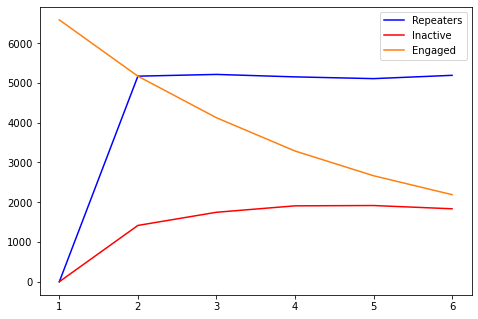

In [179]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1,])
ax.plot(list_1,customer_df_plot["Repeaters"],color='b',label="Repeaters")
ax.plot(list_1,customer_df_plot["Inactive"],color='r',label="Inactive")
ax.plot(list_1,customer_df_plot["Engaged"],color='tab:orange',label="Engaged")
ax.legend()
plt.savefig('Customer Types.png', dpi=600, bbox_inches='tight')

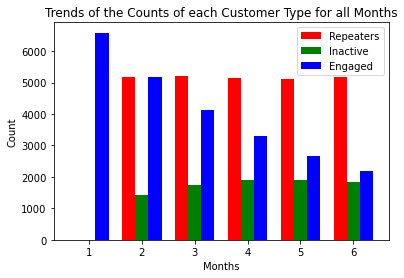

In [195]:
N = 6
ind = np.arange(N) 
width = 0.25
  

bar1 = plt.bar(ind, list_repeaters, width, color = 'r')
  
bar2 = plt.bar(ind+width,list_inactive, width, color='g')
  
bar3 = plt.bar(ind+width*2, list_engaged, width, color = 'b')
  
plt.xlabel("Months")
plt.ylabel('Count')
plt.title("Trends of the Counts of each Customer Type for all Months")
  
plt.xticks(ind+width,['1', '2', '3','4','5','6'])
plt.legend( (bar1, bar2, bar3), ('Repeaters', 'Inactive', 'Engaged') )

plt.savefig('Customer Final.png', dpi=600, bbox_inches='tight')


In [180]:
pip install dataframe_image

Note: you may need to restart the kernel to use updated packages.


In [181]:
import dataframe_image as dfi

In [182]:
dfi.export(customer_df,"customer_df")

[0724/153242.593163:INFO:headless_shell.cc(660)] Written to file /var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/tmph2s1aye2/temp.png.
